In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

if not cv.useOptimized():
    cv.setUseOpitimized(True)

cv.useOptimized()

True

# Exercise 1

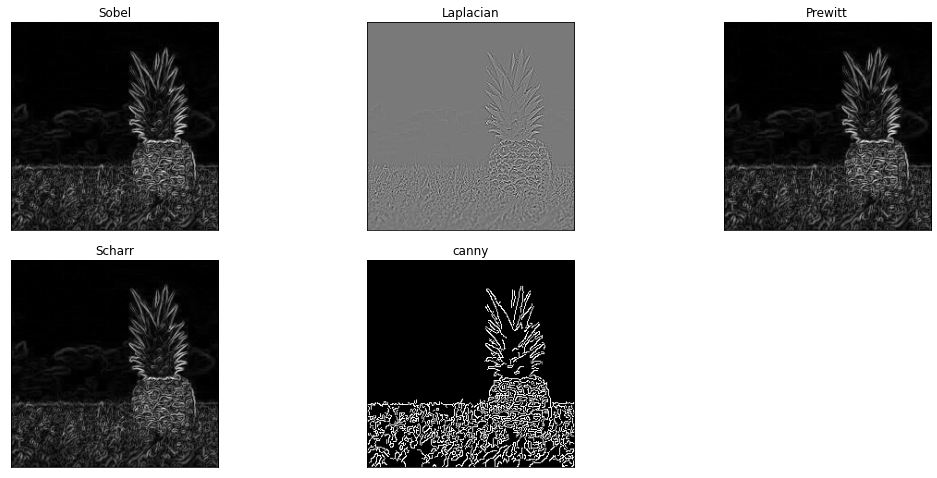

In [25]:
img = cv.imread("images/pineapple.jfif", 0)

#Sobel
sobel_x = cv.Sobel(img, cv.CV_32F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_32F, 0, 1, ksize=3)
sobel_edges = cv.magnitude(sobel_x, sobel_y) #combine sobel x and y

#Laplacian
laplacian_edges = cv.Laplacian(img, cv.CV_32F)

#Prewitt
prewitt_x = cv.filter2D(img, cv.CV_32F, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv.filter2D(img, cv.CV_32F, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_edges = cv.magnitude(prewitt_x, prewitt_y) #combine prewitt x and y

# Scharr
scharr_x = cv.Scharr(img, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(img, cv.CV_32F, 0, 1)
scharr_edges = cv.magnitude(scharr_x, scharr_y)

#Canny
canny_edges = cv.Canny(img, 100, 300)

#Display
plt.figure(figsize=(15, 10))

# edges are emphasized in the image.
plt.subplot(331), plt_img(sobel_edges, "Sobel")

# sharp changes in gradient will be emphasized.
plt.subplot(332), plt_img(laplacian_edges, "Laplacian")

# Detected eges are not prominent and not as good as sobel
plt.subplot(333), plt_img(prewitt_edges, "Prewitt")

# Detect sharp edges and looks cleaner than the above edge detection
plt.subplot(334), plt_img(scharr_edges, "Scharr")

# Able to detect many edges, including the grass
plt.subplot(335), plt_img(canny_edges, "canny")

plt.tight_layout()
plt.show()

# Exercise 2

In [26]:
img = cv.imread("images/electronic.jfif")

mask = cv.Canny(img, 200, 300)

contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

min_peri = 500
for cnt in contours:
    peri = cv.arcLength(cnt, False)
    if peri > min_peri:
        x, y, w, h = cv.boundingRect(cnt)
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

show_img("detected laptop", img)

# Exercise 3

In [33]:
img = cv.imread("images/clock.jpg")

blur = cv.GaussianBlur(img, (3, 3), 0)
mask = cv.Canny(blur, 200, 300)

#find contour
contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

min_area = 200
max_area = 600
for contour in contours:
    area = cv.arcLength(contour, True)
    if area > min_area and area < max_area:
        cv.drawContours(img, contour, -1, (0, 255, 0), 2)
        
cv.imshow("isolated_clock", mask)
show_img("contour", img)

cv.waitKey(0)
cv.destroyAllWindows()